> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Perform operations to inspect data
# types and look for instances of missing or possibly errant data
df.info()
#printing conclude that there is no object type columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


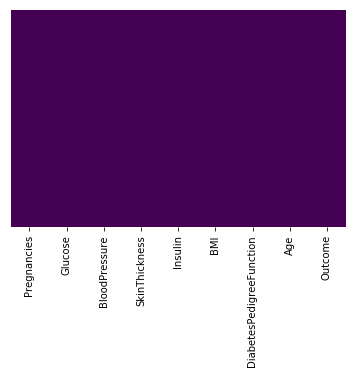

In [5]:
#checking for missing values in our dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#heatmap shows that there is no null values in the dataset

In [6]:
#another way to check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#check for 0 values in each column
print('BP:',df[df.BloodPressure==0].shape[0])
print('Glucose:',df[df.Glucose==0].shape[0])
print('Skin thickness:',df[df.SkinThickness==0].shape[0])
print('Insulin:',df[df.Insulin==0].shape[0])
print('BMI:',df[df.BMI==0].shape[0])


BP: 35
Glucose: 5
Skin thickness: 227
Insulin: 374
BMI: 11


> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replacing Zero Values with the Mean)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#separating negative and positive classes to calculate a more accurate mean

In [8]:
#Now we need to the fill the zero's values with the mean of the other values
#so we first replace each zero value with a null to calculate the mean
#then replace all NaNs with the mean values 
columns= ['BloodPressure','Glucose','SkinThickness','Insulin','BMI']
for column in columns:
    df[column] = df[column].replace(0,np.NaN)
    positive = df.loc[df['Outcome']==1]
    negative = df.loc[df['Outcome']==0]
    positive_mean = positive[column].mean(skipna=True)
    negative_mean = negative[column].mean(skipna=True)
    df.update(df[df['Outcome']== 0][column].replace(np.NaN,negative_mean))
    df.update(df[df['Outcome']== 1][column].replace(np.NaN,positive_mean))
    
#df.describe()

In [9]:
#check after cleaning
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


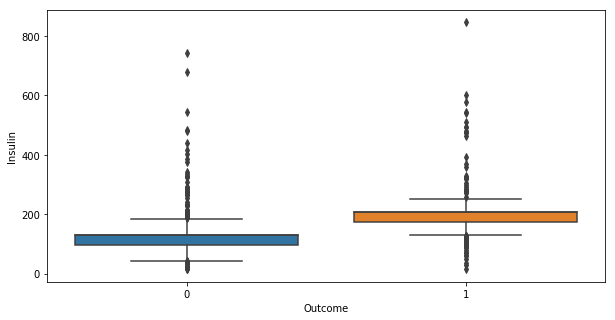

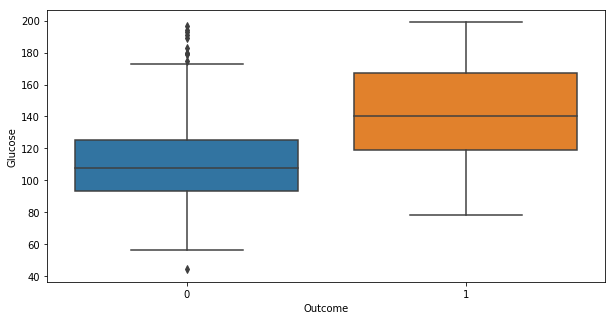

In [10]:
#boxplots for Insulin and Glucose
plt.figure(figsize=(10,5))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.figure(figsize=(10,5))
sns.boxplot(x='Outcome', y='Glucose', data=df)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Diabetic vs non-diabetic count

In [11]:
#plot histogram of diabetic vs non-diabetic
def hist_count(column, data):
    if column in data:
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, data=data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    plt.show()


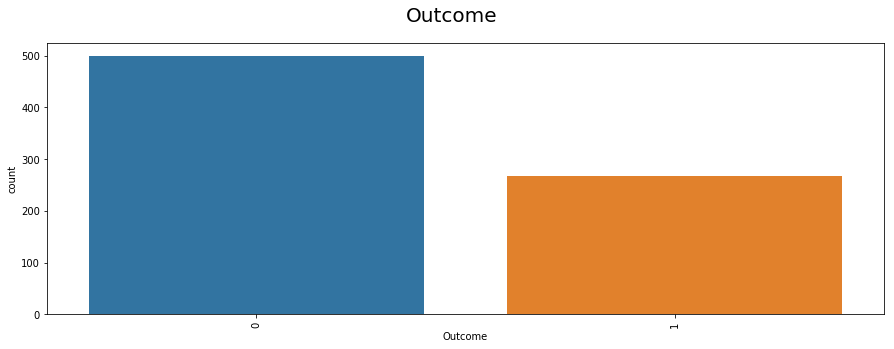

In [12]:
hist_count('Outcome',df)

### All features relation to Outcome

In [ ]:
#Pregnancies and outcome
fig = px.histogram(df, x = df['Pregnancies'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['Pregnancies'], color = 'Outcome')
fig2.show()

In [ ]:
#Glucose and Outcome
fig = px.histogram(df, x = df['Glucose'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['Glucose'], color = 'Outcome')
fig2.show()

In [ ]:
#BloodPressure vs Outcome
fig = px.histogram(df, x = df['BloodPressure'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['BloodPressure'], color = 'Outcome')
fig2.show()


In [ ]:
#SkinThickness vs Outcome
fig = px.histogram(df, x = df['SkinThickness'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['SkinThickness'], color = 'Outcome')
fig2.show()

In [ ]:
#Insulin vs Outcome
fig = px.histogram(df, x = df['Insulin'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['Insulin'], color = 'Outcome')
fig2.show()

In [ ]:
#BMI and Outcome
fig = px.histogram(df, x = df['BMI'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['BMI'], color = 'Outcome')
fig2.show()


In [ ]:
#DiabetesPedigreeFunction and Outcome
fig = px.histogram(df, x = df['DiabetesPedigreeFunction'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['DiabetesPedigreeFunction'], color = 'Outcome')
fig2.show()

In [ ]:
# Age and Outcome
fig = px.histogram(df, x = df['Age'], color = 'Outcome')
fig.show()
fig2 = px.box(df, x = df['Age'], color = 'Outcome')
fig2.show()


> **Note: if you have more questions and insights don't hesitate to do it**

<a id='pre'></a>
## Build a Prediction Model


In [13]:
#getting features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x = pd.get_dummies(df[features])

# Getting Predicting Value
y = df['Outcome']


In [14]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 242)

In [15]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

## Logistic Regression

In [17]:

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

acc_logisreg = accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[146  21]
 [ 15  49]]
             precision    recall  f1-score   support

          0       0.91      0.87      0.89       167
          1       0.70      0.77      0.73        64

avg / total       0.85      0.84      0.85       231



## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#try different k values
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    


Text(0,0.5,'Error Rate')

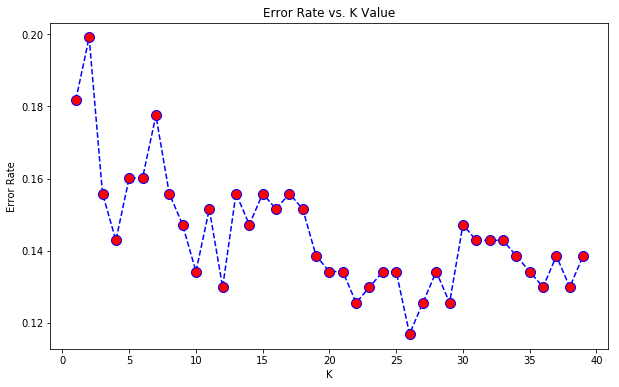

In [20]:
#plot the k-value with its corresponding error to choose best k.
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
#it is clear that the best k is around 26.
knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

acc_knn = accuracy_score(y_test, pred)

print('WITH K=26')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=26


[[148  19]
 [  8  56]]


             precision    recall  f1-score   support

          0       0.95      0.89      0.92       167
          1       0.75      0.88      0.81        64

avg / total       0.89      0.88      0.89       231



## SVM


In [22]:
from sklearn.svm import SVC

In [23]:
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
#apply SVM model and print its results
predictions = model.predict(x_test)

acc_svm = accuracy_score(y_test, predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[149  18]
 [ 14  50]]
             precision    recall  f1-score   support

          0       0.91      0.89      0.90       167
          1       0.74      0.78      0.76        64

avg / total       0.86      0.86      0.86       231



## DT

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree= dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

acc_dt = accuracy_score(y_test, predictions)

In [26]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[128  39]
 [ 21  43]]


             precision    recall  f1-score   support

          0       0.86      0.77      0.81       167
          1       0.52      0.67      0.59        64

avg / total       0.77      0.74      0.75       231



## RF


In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc = rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

acc_rf = accuracy_score(y_test, rfc_pred)

In [28]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[128  39]
 [ 21  43]]


             precision    recall  f1-score   support

          0       0.86      0.77      0.81       167
          1       0.52      0.67      0.59        64

avg / total       0.77      0.74      0.75       231



## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

In [ ]:
from sklearn.model_selection import  KFold,GridSearchCV

                    Model     Score
1   K - Nearest Neighbors  0.883117
4           Random Forest  0.870130
2  Support Vector Machine  0.861472
0     Logistic Regression  0.844156
3           Decision Tree  0.740260


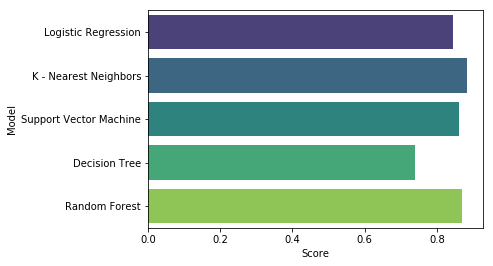

In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','K - Nearest Neighbors','Support Vector Machine', 'Decision Tree', 'Random Forest'],
    'Score': [acc_logisreg, acc_knn, acc_svm, acc_dt, acc_rf]})
print(models.sort_values(by='Score', ascending=False))
sns.barplot(x = models['Score'], y = models['Model'], palette='viridis');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work send it and Congratulations!